# Problem 1.5
## Vi Ly
[Perceptron](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)

In [19]:
using Plots

In [20]:
# Linear seperable data function 
function make_linearily_separable_data(n)
    coeff = rand(2)
    X = rand(n,2)
    above = []
    below = []
    
    for i = 1:n
        if coeff[1]*X[i,1] + coeff[2] < X[i,2]
            push!(above, (X[i,1], X[i,2]))
        end
        if coeff[1]*X[i,1] + coeff[2] > X[i,2]
            push!(below, (X[i,1], X[i,2]))
        end
    end
    
    return above, below, coeff
end 

make_linearily_separable_data (generic function with 1 method)

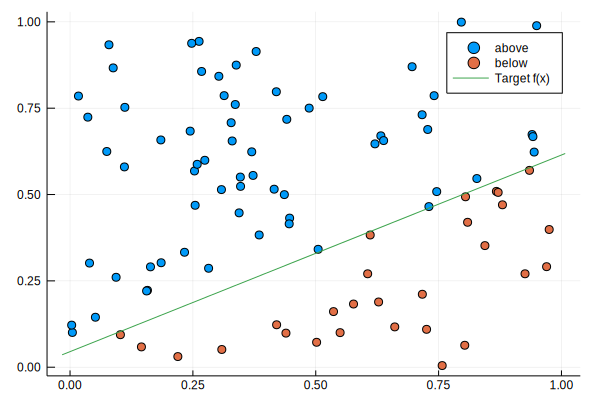

In [22]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(100)
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")

In [23]:
# Make data arrays 
Y_train = [1 for _ in above]
D_train = [x for x in above]
for x in below
    push!(D_train, x)
    push!(Y_train, -1)
end

In [24]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

# Perceptron Learning Algorithm 
function PLA_2!(w, x, y, n)
    n = n
    if h(w, x)*y < 1
        s = h(w,x)
        w += n*(y-s)*[1.0, x[1], x[2]]
    end
    return w
end

PLA_2! (generic function with 1 method)

In [25]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D_train], [x[1] == 1 ? 1 : -1 for x in Y_train]
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 100)
end
w1 = w

3-element Array{Float64,1}:
    0.7066741432987271
 -684.0815814888184   
 1610.4406933948858   

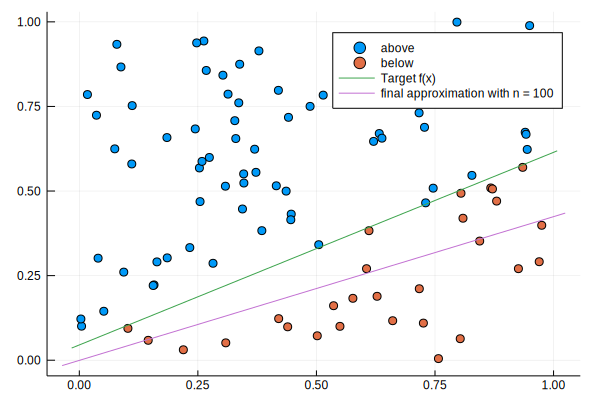

In [26]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 100")

**Error on the test set**

In [27]:
above2, below2, coeff2 = make_linearily_separable_data(10000)
# Make data arrays 
Y_test = [1 for _ in above2]
D_test = [x for x in above2]
for x in below2
    push!(D_test, x)
    push!(Y_test, -1)
end
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X_test, Y_test = [[x[1], x[2]] for x in D_test], [x[1] == 1 ? 1 : -1 for x in Y_test]

(Array{Float64,1}[[0.38132, 0.935962], [0.596269, 0.731979], [0.0713095, 0.686824], [0.327763, 0.945314], [0.494245, 0.681227], [0.431886, 0.69709], [0.384307, 0.947418], [0.0457518, 0.555105], [0.212494, 0.684194], [0.614339, 0.758562]  …  [0.586811, 0.0296231], [0.711717, 0.264893], [0.292281, 0.225306], [0.357164, 0.266635], [0.763324, 0.456713], [0.48506, 0.407452], [0.125549, 0.387282], [0.691323, 0.195202], [0.367813, 0.267053], [0.710455, 0.0308666]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w1, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.4565

**b) n = 1**

In [29]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 1)
end
w2 = w

3-element Array{Float64,1}:
 -1.3060476598286632
 -7.980016146109576 
 15.393799491088187 

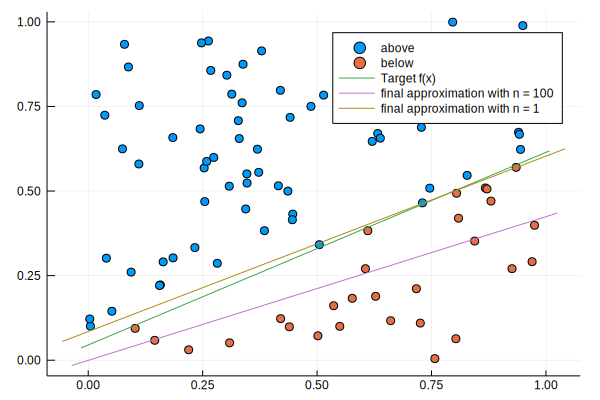

In [30]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 1")

In [31]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w2, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.3278

**c) n = 0.01**

In [32]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 0.01)
end
w3 = w

3-element Array{Float64,1}:
 -0.008852380225603702
 -0.2262269042389247  
  0.4036657010255142  

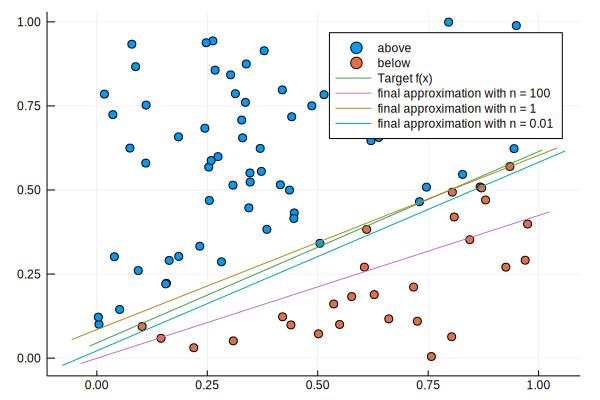

In [33]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 0.01")

In [34]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w3, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.3693

**d) n = 0.0001**

In [35]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w3 = PLA_2!(w, X[j], Y[j], 0.0001)
end
w4 = w

3-element Array{Float64,1}:
 0.6969122696750534 
 0.41176761483914626
 0.7273349927756514 

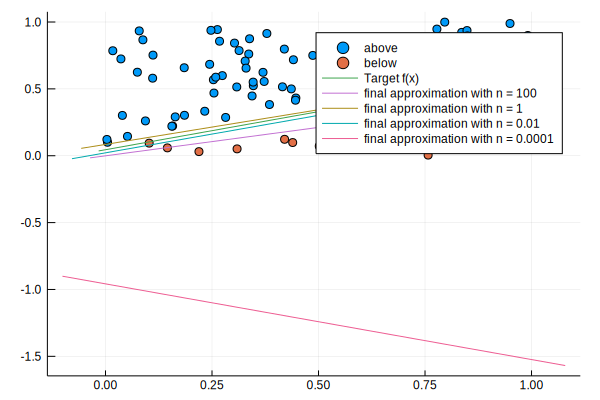

In [36]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 0.0001")

In [37]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w4, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.6674

*From the graphs from a) - d), we can conclude that n = 1 has the smallest error value.*